#### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\demo_data\2.concerticcir1.csv", header=None)
df

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0
...,...,...,...
95,-0.474862,-0.224981,1.0
96,0.126272,0.869784,0.0
97,-0.647365,-0.363424,1.0
98,0.474405,1.011016,0.0


<AxesSubplot:xlabel='0', ylabel='1'>

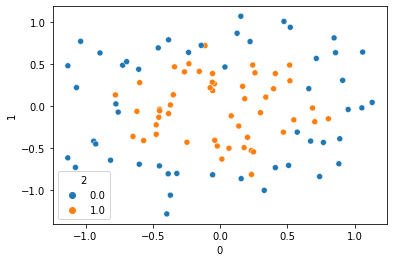

In [4]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],data=df)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [7]:
x_train= std.fit_transform(x_train)
x_test = std.transform(x_test)

In [8]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [11]:

model = Sequential()
model.add(Dense(8,activation='relu',kernel_initializer = 'he_uniform' ,input_dim = 2))

model.add(Dense(4,activation='relu',kernel_initializer = 'he_uniform'))

model.add(Dense(2,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
save = model.fit(x_train, y_train, epochs = 450, validation_split= 0.2)

Epoch 1/450
3/3 [==============================] - 1s 158ms/step - loss: 0.6797 - accuracy: 0.5417 - val_loss: 0.6906 - val_accuracy: 0.3889
Epoch 2/450
3/3 [==============================] - 0s 16ms/step - loss: 0.6790 - accuracy: 0.5417 - val_loss: 0.6906 - val_accuracy: 0.3889
Epoch 3/450
3/3 [==============================] - 0s 17ms/step - loss: 0.6782 - accuracy: 0.5417 - val_loss: 0.6906 - val_accuracy: 0.3889
Epoch 4/450
3/3 [==============================] - 0s 17ms/step - loss: 0.6776 - accuracy: 0.5417 - val_loss: 0.6905 - val_accuracy: 0.3889
Epoch 5/450
3/3 [==============================] - 0s 18ms/step - loss: 0.6768 - accuracy: 0.5417 - val_loss: 0.6904 - val_accuracy: 0.3889
Epoch 6/450
3/3 [==============================] - 0s 17ms/step - loss: 0.6761 - accuracy: 0.5417 - val_loss: 0.6903 - val_accuracy: 0.3889
Epoch 7/450
3/3 [==============================] - 0s 17ms/step - loss: 0.6755 - accuracy: 0.5417 - val_loss: 0.6902 - val_accuracy: 0.3889
Epoch 8/450
3/3 [==

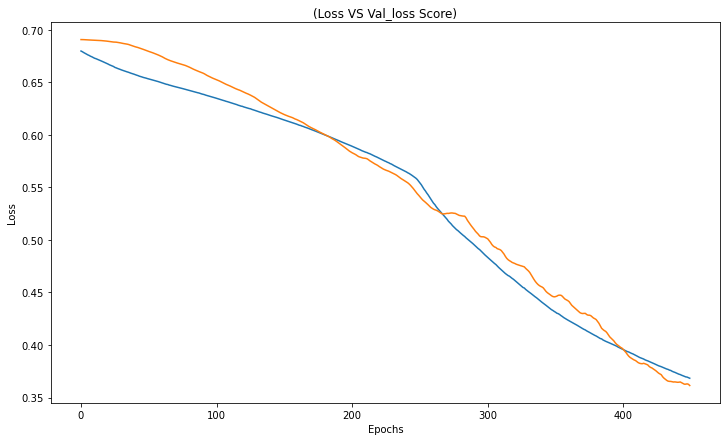

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(save.history['loss'])
plt.plot(save.history['val_loss'])
plt.title("(Loss VS Val_loss Score)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [15]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 82ms/step


In [16]:
y_capf=np.where(y_pred>0.5,1,0)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

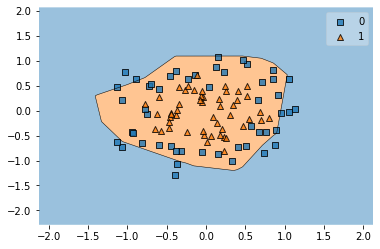

In [18]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 1ms/step


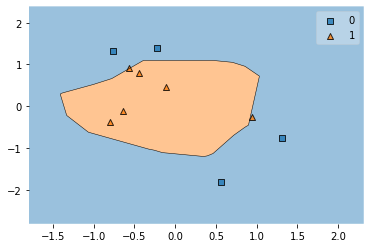

In [19]:
plot_decision_regions(x_test, y_test.values.astype(int), clf = model);